In [859]:
import pandas as pd
import numpy as np
import copy, time
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, metrics
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_features.csv')

df_train['poi'] = df_train['poi'].astype(int)
train_Y = df_train['poi']
train_num = train_Y.shape[0]


names = df_test['name']
df_train = df_train.drop(['name', 'poi', 'loan_advances'] , axis=1)
df_test = df_test.drop(['name', 'loan_advances'] , axis=1)
#df = pd.concat([df_train,df_test])
#df.reset_index(drop=True, inplace=True)

#df_train.dtypes.value_counts()


In [860]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df_train.dtypes, df_train.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df_train = df_train[num_features]
df_test = df_test[num_features]

18 Numeric Features : ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']



count    6.100000e+01
mean     1.147436e+06
std      1.505189e+06
min      7.000000e+04
25%      4.500000e+05
50%      7.500000e+05
75%      1.000000e+06
max      8.000000e+06
Name: bonus, dtype: float64


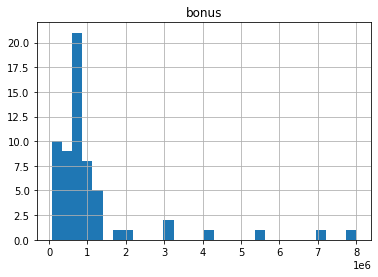

count    2.800000e+01
mean     6.344374e+05
std      8.603646e+05
min     -1.025000e+05
25%      7.656750e+04
50%      1.951900e+05
75%      8.342052e+05
max      2.964506e+06
Name: deferral_payments, dtype: float64


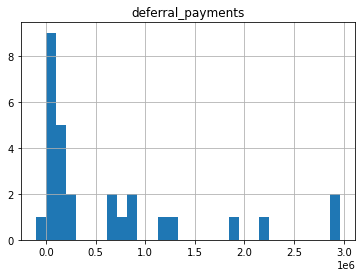

count    3.400000e+01
mean    -4.625664e+05
std      8.095392e+05
min     -3.504386e+06
25%     -5.527032e+05
50%     -1.175340e+05
75%     -2.708325e+04
max     -1.042000e+03
Name: deferred_income, dtype: float64


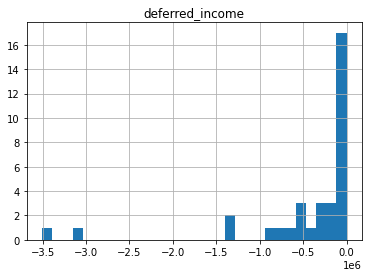

count        13.000000
mean      89397.846154
std       41143.391399
min        3285.000000
25%      101250.000000
50%      108579.000000
75%      112492.000000
max      125034.000000
Name: director_fees, dtype: float64


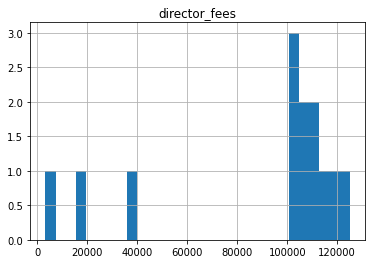

count    8.100000e+01
mean     2.985081e+06
std      6.004174e+06
min      3.285000e+03
25%      4.004780e+05
50%      8.500100e+05
75%      2.165172e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64


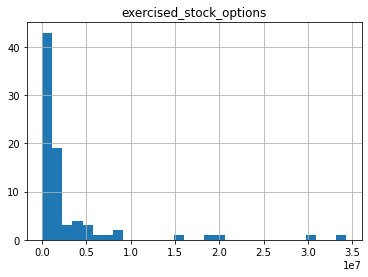

count        73.000000
mean      51040.547945
std       47596.682104
min         148.000000
25%       18834.000000
50%       41953.000000
75%       59175.000000
max      228763.000000
Name: expenses, dtype: float64


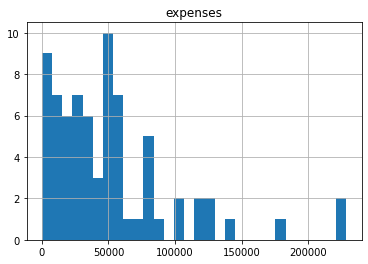

count       65.000000
mean       711.323077
std       2074.497628
min         12.000000
25%         19.000000
50%         45.000000
75%        215.000000
max      14368.000000
Name: from_messages, dtype: float64


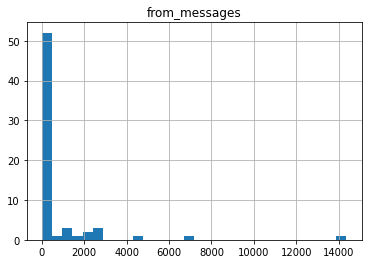

count     65.000000
mean      64.800000
std       91.863214
min        0.000000
25%       10.000000
50%       28.000000
75%       88.000000
max      528.000000
Name: from_poi_to_this_person, dtype: float64


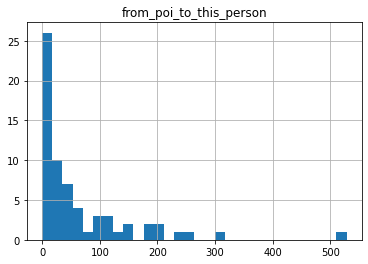

count     65.000000
mean      40.092308
std       88.901407
min        0.000000
25%        0.000000
50%        7.000000
75%       27.000000
max      411.000000
Name: from_this_person_to_poi, dtype: float64


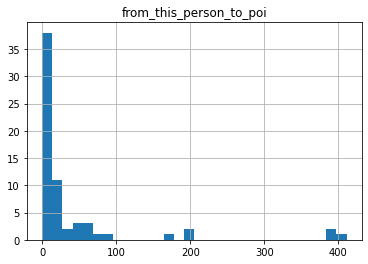

count    4.900000e+01
mean     7.926171e+05
std      9.504645e+05
min      7.102300e+04
25%      2.750000e+05
50%      4.221580e+05
75%      8.318090e+05
max      5.145434e+06
Name: long_term_incentive, dtype: float64


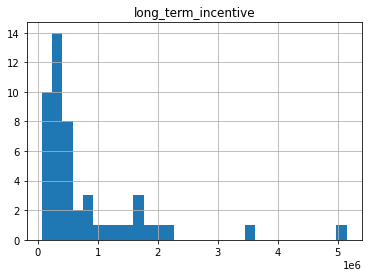

count    6.900000e+01
mean     4.471774e+05
std      1.341564e+06
min      2.000000e+00
25%      9.720000e+02
50%      5.238200e+04
75%      3.620960e+05
max      1.035973e+07
Name: other, dtype: float64


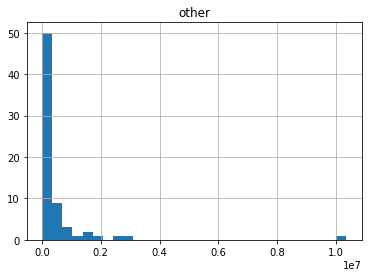

count    8.200000e+01
mean     1.294855e+06
std      2.498335e+06
min      4.409300e+04
25%      2.689220e+05
50%      4.628225e+05
75%      9.664905e+05
max      1.476169e+07
Name: restricted_stock, dtype: float64


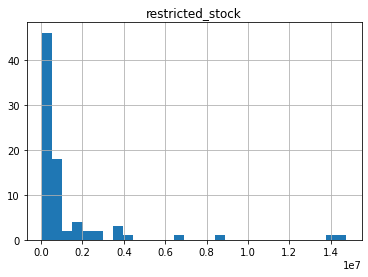

count        10.000000
mean    -221885.700000
std      205191.374121
min     -560222.000000
25%     -389621.750000
50%     -139856.500000
75%      -77953.250000
max       44093.000000
Name: restricted_stock_deferred, dtype: float64


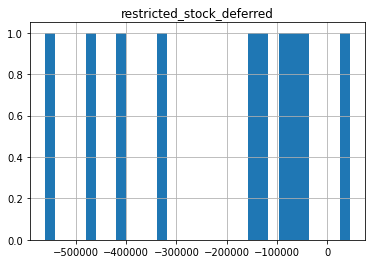

count    7.300000e+01
mean     2.739025e+05
std      1.716647e+05
min      4.770000e+02
25%      2.061210e+05
50%      2.516540e+05
75%      2.885890e+05
max      1.111258e+06
Name: salary, dtype: float64


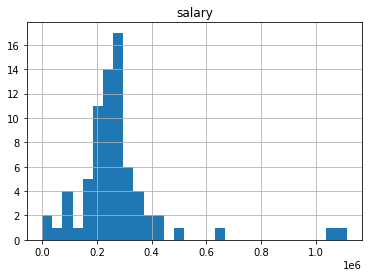

count      65.000000
mean     1111.369231
std      1165.852016
min         2.000000
25%       178.000000
50%       599.000000
75%      1902.000000
max      4527.000000
Name: shared_receipt_with_poi, dtype: float64


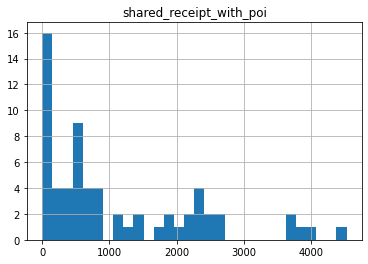

count       65.000000
mean      2156.061538
std       2811.676718
min         57.000000
25%        517.000000
50%       1088.000000
75%       2649.000000
max      15149.000000
Name: to_messages, dtype: float64


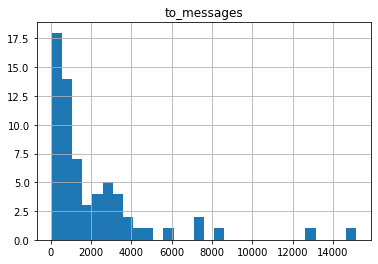

count    9.600000e+01
mean     2.590977e+06
std      1.056645e+07
min      1.480000e+02
25%      3.024025e+05
50%      1.106740e+06
75%      1.985668e+06
max      1.035598e+08
Name: total_payments, dtype: float64


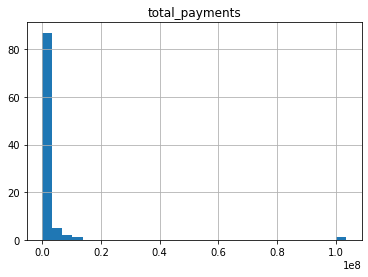

count    9.800000e+01
mean     3.527136e+06
std      7.182997e+06
min     -4.409300e+04
25%      4.211518e+05
50%      9.979710e+05
75%      2.493616e+06
max      4.911008e+07
Name: total_stock_value, dtype: float64


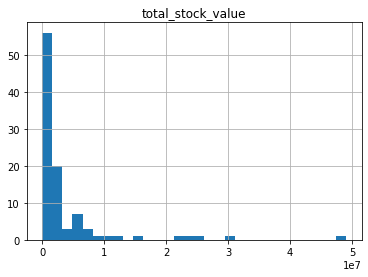

In [861]:
import matplotlib.pyplot as plt

for col in num_features:
    #plt.hist(df[col], 30)
    print (df_train[col].describe())
    df_train[col].hist(bins=30)
    plt.title(col)
    plt.show()

#print (df_train['director_fees'].describe())
#df_train['director_fees'].hist()



In [862]:
# 空值補 0
#'salary', 'other'，空值用平均值
for feature in num_features:  
    mid = np.median(df_train[~df_train[feature].isnull()][feature])
    if feature=='salary' or feature=='other':
        # 得到 median 
        
        #print (mid)
        #df[feature] = df[feature].fillna(df[feature].mean())
        df_train[feature] = df_train[feature].fillna(df[feature].median())
    else:
        df_train[feature] = df_train[feature].fillna(0)
    #df_train[feature] = standard_normalize(df_train[feature])

#標準化
#df = StandardScaler().fit_transform(df)

    
#一起做完補缺植和標準化後，再分回去train and test
#df_train=df[:train_num]
#df_test=df[train_num:]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
#自己認為outliner的features，將outliner移除

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
#outliers_index=[]        
outliner_features = ['from_messages', 'from_poi_to_this_person', 'loan_advances',
                     'other', 'total_payments', 'total_stock_value']
for feature in num_features:
    print (feature)
    
    #feature_data=list(df_train[feature][df_train[feature].notnull()])
    feature_data = list(df_train[feature])
    #print (feature_data)
    data_mean, data_std = mean(feature_data), std(feature_data)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in feature_data if x < lower or x > upper]
    '''
    for outlier in outliers:
        #print (outlier)
        #print(df[df['bonus']==outlier].index.values)
        outliers_index.append(df[df['bonus']==outlier].index.values[0])
    outliers_removed = [x for x in bonus if x >= lower and x <= upper]
    '''
    
    #mid = np.median(df_train[~df_train[feature].isnull()][feature])
    #for outlier in outliers:
    #    df_train[feature].replace({outlier: mid}, inplace = True)
    
    
    keep_indexs = (df_train[feature]> lower) & (df_train[feature]< upper)
    #for i in keep_indexs:
    #    df_train.replace({feature: i}, mid)
        
        
    df_train = df_train[keep_indexs]
    train_Y = train_Y[keep_indexs]


    print('Identified outliers: %d' % len(outliers))
    #print ("data_mean: ".format(), data_mean)
    #print ("data_std: ".format(),  data_std)
    #print ("cut_off" .format(),  cut_off)
    #print ("lower: " .format(),  lower)
    #print ("upper: " .format(),  upper)
    print ("outliers: " .format(),  outliers)
    #print ("outliers_index: " .format(),  outliers_index)
    print ("\n")

#print (train_Y.shape)

In [ ]:
#標準化
def min_max_normalize(x):
    x = (( (x - min(x)) / ( max(x) - min(x) ) ) - 0.5) * 2
    return x

def standard_normalize(x):
    x = ( (x - min(x)) / ( max(x) - min(x) ) )
    return x

def z_transform(x):
    x = ( (x - np.mean(x)) / (np.std(x)) )
    return x



for feature in num_features: 
    df_train[feature] = standard_normalize(df_train[feature])

In [ ]:
df_train

In [ ]:
'''
train_X, val_X, train_Y, val_Y = train_test_split(df_train, train_Y,
                                                    test_size=0.25, random_state=42)

print ("val_Y:\n")
print (val_Y.shape)
print ("train_Y\n")
print (train_Y.shape)
'''

In [ ]:
#處理df_test
for feature in num_features:  
    if feature=='salary' or feature=='other':
        # 得到 median 
        mid = np.median(df_test[~df_test[feature].isnull()][feature])
        df_test[feature] = df_test[feature].fillna(df_test[feature].median)
    else:
        df_test[feature] = df_test[feature].fillna(0)
        
    df_test[feature] = standard_normalize(df_test[feature])

In [ ]:
# 將資料最大最小化
#df = MinMaxScaler().fit_transform(df)

train_X = df_train
test_X = df_test

# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=19,
                                  max_depth=6, learning_rate=0.03)

dt = DecisionTreeClassifier(criterion = "gini", max_depth=None, min_samples_split=2, min_samples_leaf=1)


rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)


#rf = RandomForestClassifier()


In [ ]:
'''
# 設定要訓練的超參數組合
n_estimators = [50, 100, 150]
max_depth = [1, 3, 5, 10]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(rf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(train_X, train_Y)

print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

rf_bestparam = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                                      max_features='sqrt', max_depth=6, bootstrap=True)

'''


In [ ]:
# 邏輯迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': lr_pred})
sub.to_csv('submit_lr.csv', index=False) 
cross_val_score(lr,train_X,train_Y,cv=10).mean()



In [ ]:
# 梯度提升機預測檔 
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': gdbt_pred})
sub.to_csv('submit_gdbt.csv', index=False) 
cross_val_score(gdbt,train_X,train_Y,cv=10).mean()



In [ ]:
#決策樹預測檔
dt.fit(train_X, train_Y)
dt_pred = dt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': dt_pred})
sub.to_csv('submit_dt.csv', index=False)
cross_val_score(dt,train_X,train_Y,cv=10).mean()



In [ ]:
# 隨機森林
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
print(cross_val_score(rf,train_X,train_Y,cv=10).mean())



In [ ]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': rf_pred})
sub.to_csv('submit_rf.csv', index=False) 
cross_val_score(rf,train_X,train_Y,cv=10).mean()


#clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X, train_Y)
xgb.score(train_X, train_Y)




In [251]:
df_temp

array([[4.09257004e-01, 2.40279096e-01, 0.00000000e+00, ...,
        5.61887092e-02, 1.07944412e-01, 7.33090455e-01],
       [3.16686967e-02, 2.40279096e-01, 9.99107995e-01, ...,
        1.11317254e-02, 4.28384543e-01, 8.23659873e-02],
       [1.77831912e-01, 2.40279096e-01, 8.68261766e-01, ...,
        1.39084385e-01, 5.67077705e-01, 3.34021342e-02],
       ...,
       [2.62469280e-01, 2.40279096e-01, 8.68261766e-01, ...,
        9.46859263e-02, 1.05057782e-02, 1.15910763e-01],
       [2.62469280e-01, 2.40279096e-01, 8.68261766e-01, ...,
        3.41902995e-02, 6.99102455e-05, 7.33976137e-02],
       [1.41291108e-01, 2.40279096e-01, 8.68261766e-01, ...,
        1.00000000e+00, 2.26064506e-01, 3.34660417e-02]])